In [4]:
from keras .datasets import mnist
from tensorflow import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
from keras .datasets import mnist
from tensorflow import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [8]:
net=models.Sequential()

X_train=X_train.reshape(60000,28*28)
X_train=X_train/255
X_test=X_test.reshape(10000,28*28)
X_test=X_test/255

In [9]:
X_val=X_train[:10000]
particle_X_train=X_train[10000:]

y_val=y_train[:10000]
particle_y_train=y_train[10000:]

In [29]:
net.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10,activation='softmax'))
net.compile(optimizer='nadam', loss='categorical_crossentropy',metrics=['acc'])

In [30]:
val=net.fit(particle_X_train,particle_y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

Epoch 1/20
391/391 [==============================] - 24s 62ms/step - loss: 1.1428 - acc: 0.5199 - val_loss: 0.5319 - val_acc: 0.8019
Epoch 2/20
391/391 [==============================] - 26s 67ms/step - loss: 0.3297 - acc: 0.9110 - val_loss: 0.1955 - val_acc: 0.9557
Epoch 3/20
391/391 [==============================] - 27s 68ms/step - loss: 0.1917 - acc: 0.9556 - val_loss: 0.1688 - val_acc: 0.9619
Epoch 4/20
391/391 [==============================] - 26s 67ms/step - loss: 0.1453 - acc: 0.9669 - val_loss: 0.1438 - val_acc: 0.9654
Epoch 5/20
391/391 [==============================] - 26s 68ms/step - loss: 0.1233 - acc: 0.9726 - val_loss: 0.1217 - val_acc: 0.9712
Epoch 6/20
391/391 [==============================] - 26s 67ms/step - loss: 0.1048 - acc: 0.9771 - val_loss: 0.1168 - val_acc: 0.9742
Epoch 7/20
391/391 [==============================] - 26s 67ms/step - loss: 0.0960 - acc: 0.9790 - val_loss: 0.1331 - val_acc: 0.9700
Epoch 8/20
391/391 [==============================] - 25s 65ms

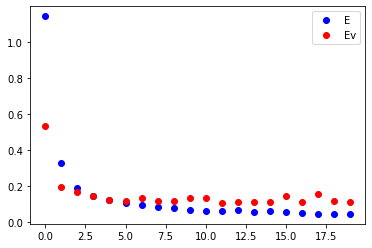

In [35]:
val_dict=val.history
loss=val_dict['loss']
val_loss=val_dict['val_loss']
x=np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='Ev')
plt.legend()

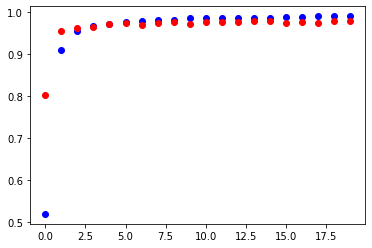

In [37]:
acc=val_dict['acc']
val_acc=val_dict['val_acc']
plt.plot(x,acc,'bo',label='A')
plt.plot(x,val_acc,'ro',label='Av')

In [38]:
test_loss,test_acc=net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1107 - acc: 0.9803
